In [128]:
#
# generate data for two electrons
#

# charges
q1 = 1
q2 = -1

# masses
m1 = 1
m2 = 0.5

# vacuum permittivity
# Lorentz-Heaviside units
eps0 = 1


In [129]:
import numpy as np

In [130]:
# define entire vector field, i.e., F such that
# \ddot{r} = F(r)
# where r is 6-dimensional and time-dependent
# note that r[:3] = first 3 elements of r
#           r[3:] = last 3 elements of r
def Fvec(r):
    r12 = np.linalg.norm(r[:3,:] - r[3:,:],axis=0)
    r12hat = (r[:3,:] - r[3:,:])/r12
    r21hat = -r12hat
    Fvec = np.zeros(r.shape)
    Fvec[:3] = (1/m1)*(q1*q2/(4*np.pi*eps0*r12**2))*r12hat
    Fvec[3:] = (1/m2)*(q2*q1/(4*np.pi*eps0*r12**2))*r21hat
    return Fvec
    

In [194]:
# store trajectories
T = 100.0
numsteps = 100000
h = T/numsteps
numtraj = 10
r = np.zeros(((numsteps+1), 6, numtraj))
r[0,0,:] = np.arange(numtraj) + 1.0
r[0,1,:] = np.arange(numtraj)/3.0 + 1.0

In [195]:
# store only the present velocity
# initially, send particle 1 towards particle 2
v = np.zeros((6, numtraj))
v[1,:] = -0.1
v[2,:] = -0.2

In [196]:
a = Fvec(r[0, :, :])
for i in range(numsteps):
    r[i+1, :, :] = r[i, :, :] + v*h + 0.5*a*(h**2)
    aold = a
    a = Fvec(r[(i+1), :, :])
    v += 0.5*(a + aold)*h

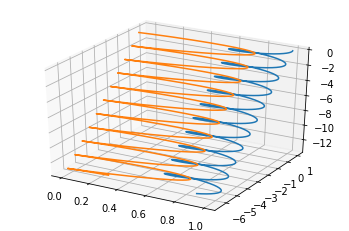

In [197]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
i = 0
ax.plot(r[:,0,i],r[:,1,i],r[:,2,i])
ax.plot(r[:,3,i],r[:,4,i],r[:,5,i])
plt.show()

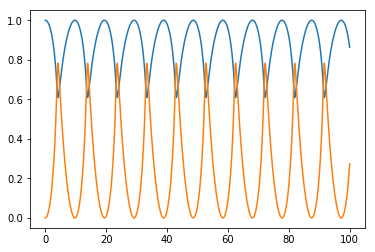

In [198]:
fig = plt.figure()
plt.plot(np.arange((numsteps+1))*h, r[:,0,i])
plt.plot(np.arange((numsteps+1))*h, r[:,3,i])
plt.show()

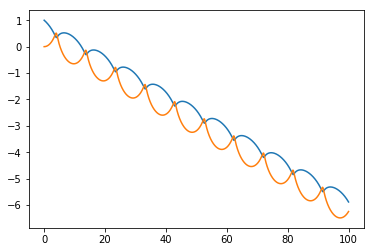

In [199]:
fig = plt.figure()
plt.plot(np.arange((numsteps+1))*h, r[:,1,i])
plt.plot(np.arange((numsteps+1))*h, r[:,4,i])
plt.show()

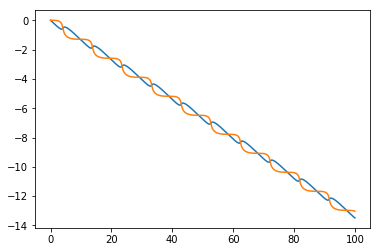

In [200]:
fig = plt.figure()
plt.plot(np.arange((numsteps+1))*h, r[:,2,i])
plt.plot(np.arange((numsteps+1))*h, r[:,5,i])
plt.show()

In [202]:
np.save("coultraj.npy",r)